In [1]:
from src.NeuralNet import NeuralNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the data

In [2]:
#load the data
df_train= pd.read_csv("Data/ParisHousing_train_data.csv")
df_test= pd.read_csv("Data/ParisHousing_test_data.csv")

#split
df_train_x =df_train.drop(columns=['price'])  
df_train_y=df_train['price'] 

df_test_x= df_test.drop(columns=['price'])  
df_test_y = df_test['price'] 


### 2. Preprocesing

In [3]:
y_train = df_train_y.values.reshape(-1, 1)
y_test = df_test_y.values.reshape(-1, 1)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y_train)

x_train = df_train_x.values
x_test = df_test_x.values

### 3. Training

In [4]:

layers = [x_train.shape[1], 16,8, 1]  
activation = "leaky_relu"  
learning_rate = 0.00001  
momentum = 0.2
validation_split = 0.2 
output_activation = 'relu'

# Initialize
nn = NeuralNet(layers, activation=activation, output_activation=output_activation, lr=learning_rate, momentum=momentum, validation_split=validation_split, l2=0.0001, dropout_rate=0.3)

# train
epochs = 100
nn.fit(x_train, y, epochs=epochs)

 # loss
losses = nn.loss_epochs()


Initial predictions (before training):
Input: [-1.24643231 -1.64085603 -1.01511421 -1.00652126 -0.32330793 -0.86900278
  1.56708275  0.17259591 -1.57057618 -0.99575899 -1.00175153 -0.63807183
  1.05241306 -1.67499843  0.99178375 -0.94555365], Initial prediction: [0.], Actual: [0.14084867]
Input: [ 0.02435523 -0.21183115 -1.01511421  0.99352099 -1.36170076 -1.36564203
 -1.56664751 -1.58768869  1.33555618 -0.99575899  0.99825153 -0.39453212
  1.03448439 -1.62540342 -1.00828431 -1.26133029], Initial prediction: [0.], Actual: [0.50489661]
Input: [ 0.46611466  0.06700297  0.98511083 -1.00652126  0.54201942 -0.51333538
 -0.17387851  1.22876667  1.01265258 -0.99575899  0.99825153  1.38414039
 -1.03903431 -1.40413338  0.99178375  0.31755288], Initial prediction: [0.], Actual: [0.63216687]
Input: [-1.57320226 -1.43173044  0.98511083  0.99352099  0.6804718  -0.82699864
 -1.56664751  0.52465283 -1.46294164 -0.99575899  0.99825153  1.40842498
  0.24838153  0.70174695  0.99178375  0.31755288], Init

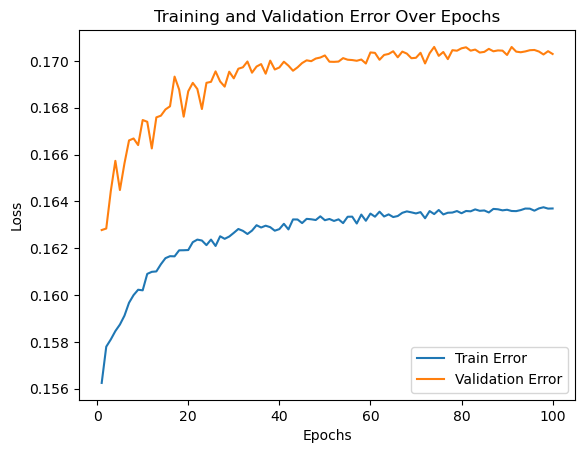

In [5]:
plt.plot(range(1, epochs + 1), losses[:, 0], label="Train Error")
if validation_split > 0:
    plt.plot(range(1, epochs + 1), losses[:, 1], label="Validation Error")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Error Over Epochs")
plt.show()



In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Make predictions on test data
y_pred_scaled = nn.predict(x_test)  # Predicciones escaladas

# De-scaling of predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Compare predictions with actual values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MAE (Mean Absolute Error):", mae_test)
print("MAPE (Mean Absolute Percentage Error):", mape_test, "%")

Mean Squared Error on Test Data: 33325581894822.215
MAE (Mean Absolute Error): 4972927.777045076
MAPE (Mean Absolute Percentage Error): 98.84263662456557 %


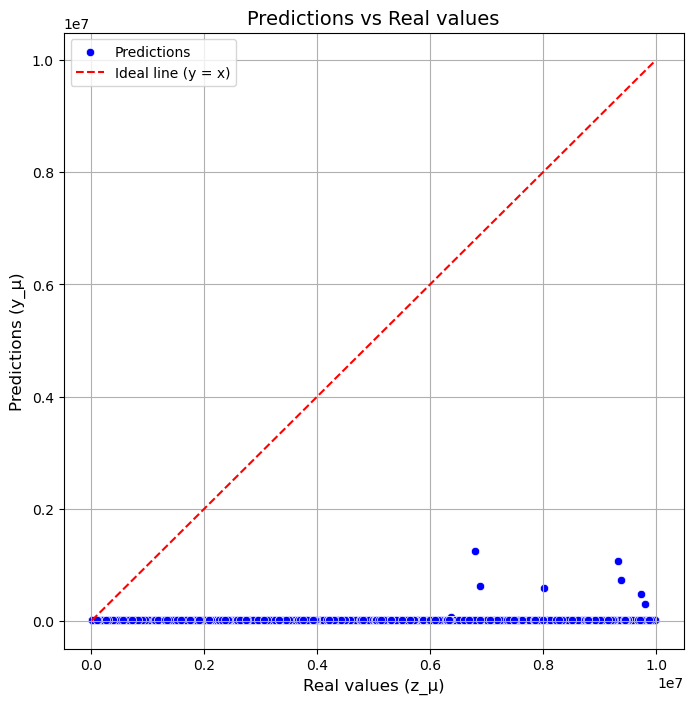

In [ ]:
# Scatter plot
y_test = np.array(y_test).flatten()  
y_pred = np.array(y_pred).flatten() 

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predictions')

min_value = min(min(y_test), min(y_test))
max_value = max(max(y_test), max(y_test))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Ideal line (y = x)')

plt.title("Predictions vs Real values", fontsize=14)
plt.xlabel("Real values (z_μ)", fontsize=12)
plt.ylabel("Predictions (y_μ)", fontsize=12)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [8]:
# Cross validation
results = nn.cross_validate(x_train, y, k=5, epochs=100)

print("Cross-validation metrics:")
print(results)


=== Fold 1/5 ===
Initial predictions (before training):
Input: [ 0.8031191   1.7400077   0.98511083  0.99352099  1.19966822  0.31843668
 -0.52207076  0.17259591  0.25921086  1.00425907 -1.00175153 -0.1967862
 -0.17742419 -1.28968337  0.99178375  1.26488277], Initial prediction: [0.], Actual: [0.72831895]
Input: [-0.28061841 -0.63008234  0.98511083 -1.00652126  0.36895395  0.82054721
 -1.21845526  0.17259591 -1.46294164 -0.99575899 -1.00175153  0.14632032
 -0.79217043 -0.56483325 -1.00828431 -1.26133029], Initial prediction: [0.], Actual: [0.41803091]
Input: [-1.36145673  0.9383596   0.98511083 -1.00652126 -0.73866507  0.27729824
 -0.87026301 -0.17946101 -1.03240352  1.00425907  0.99825153 -1.45750317
 -1.09626811  0.10279185 -1.00828431  0.94910614], Initial prediction: [0.05892461], Actual: [0.10827367]
Input: [ 0.6746117  -0.10726836 -1.01511421  0.99352099 -1.25786148  0.03039838
  1.2188905   0.17259591 -1.35530711  1.00425907  0.99825153 -0.32618836
 -1.61999191  0.80856696  0.99

c:\Users\uxuga\OneDrive\Dokumentuak\MASTER\NEURONAL\Prediction-of-Paris-Housing\src\NeuralNet.py:301: RuntimeWarning: invalid value encountered in true_divide
  mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100


Epoch 1/100 - Train Error: 0.14031642840070244 - Val Error: 0.1286227608409493

Examples of predictions (X_train):
Predicción: [0.], Real: [0.60941597]
Predicción: [0.], Real: [0.64801486]
Predicción: [0.], Real: [0.4908806]
Predicción: [0.], Real: [0.2071269]
Predicción: [0.03429409], Real: [0.63237019]
Epoch 2/100 - Train Error: 0.14197557508188513 - Val Error: 0.1364898734312751
Epoch 3/100 - Train Error: 0.14446720532096377 - Val Error: 0.1341236631136858
Epoch 4/100 - Train Error: 0.14640298278877856 - Val Error: 0.13815479296943486
Epoch 5/100 - Train Error: 0.14840143424861757 - Val Error: 0.14152281215004928
Epoch 6/100 - Train Error: 0.15014344805588853 - Val Error: 0.14216798727211827
Epoch 7/100 - Train Error: 0.15220179648534696 - Val Error: 0.14252417255573482
Epoch 8/100 - Train Error: 0.1532063713414914 - Val Error: 0.14568879697110834
Epoch 9/100 - Train Error: 0.15367483336060336 - Val Error: 0.14505110796548393
Epoch 10/100 - Train Error: 0.15439146440361 - Val Error: